In [1]:
%pip install seaborn
%pip install sklearn
%pip install scikit-learn
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import figure
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
def load_dataset():
    return pd.read_csv('winequality-red.csv')
load_dataset()
dt = load_dataset()

In [3]:
def data_cleaning(data):
    rows = data.shape[0]
    columns = data.shape[1]
    print(f'we have {rows} rows and {columns} columns', '\n')
    print(data.dtypes,'\n')
    print(data.loc[3],'\n')
    print('First 10 rows of dataset:\n',data.head(10))
    print(data.describe().T,'\n')
    duplicates = data.duplicated()
    print('How many duplicated columns we have:',duplicates.sum(),'\n')
    print(data.isnull().sum())
    data.columns = data.columns.str.lower().str.strip()
    print(data.columns)
    return  data
cle = data_cleaning(dt)

we have 1599 rows and 12 columns 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

fixed acidity           11.200
volatile acidity         0.280
citric acid              0.560
residual sugar           1.900
chlorides                0.075
free sulfur dioxide     17.000
total sulfur dioxide    60.000
density                  0.998
pH                       3.160
sulphates                0.580
alcohol                  9.800
quality                  6.000
Name: 3, dtype: float64 

First 10 rows of dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


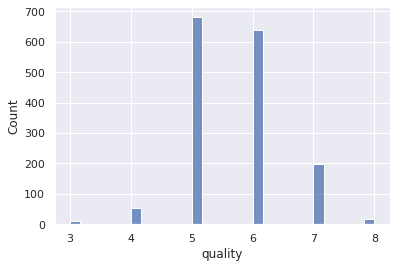

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


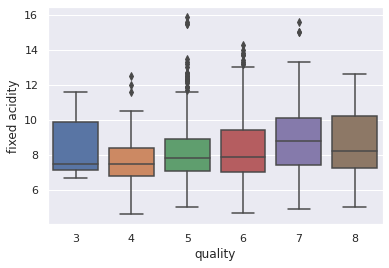

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


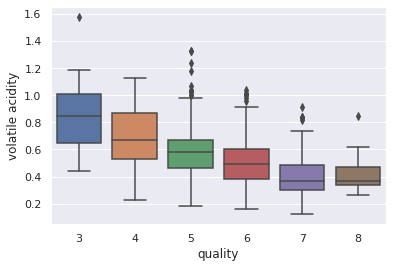

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


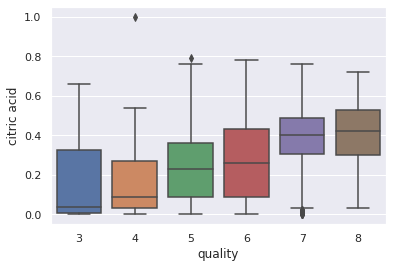

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


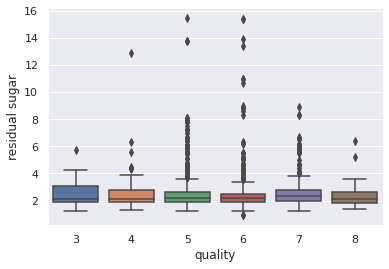

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


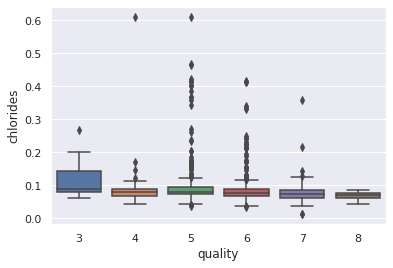

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


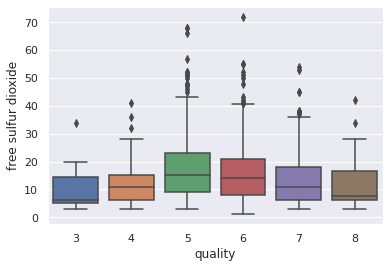

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


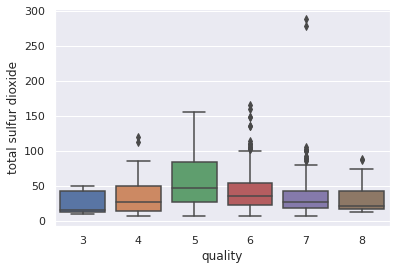

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


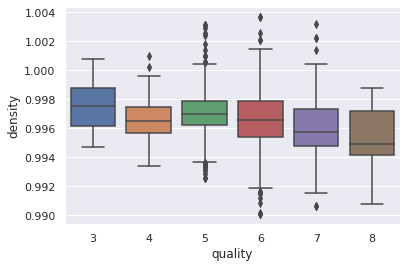

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


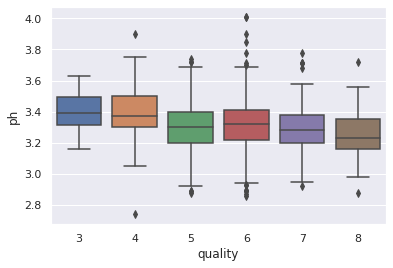

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


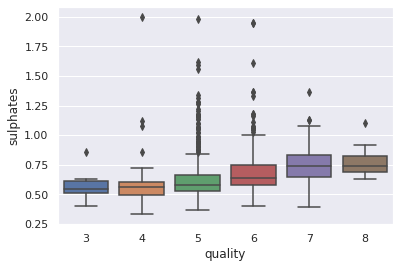

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


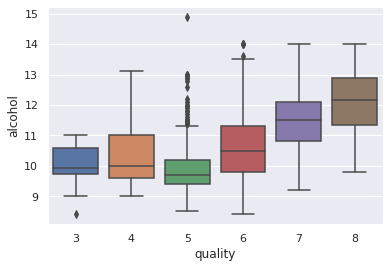

Distribution plot for each feature 



/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

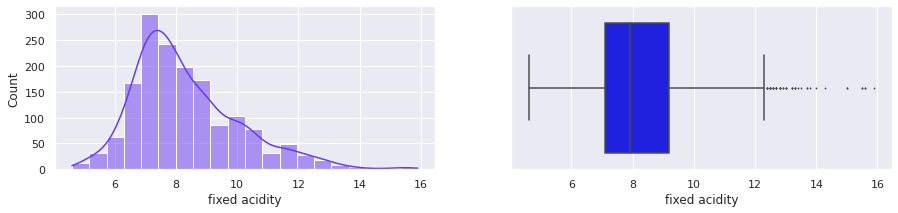

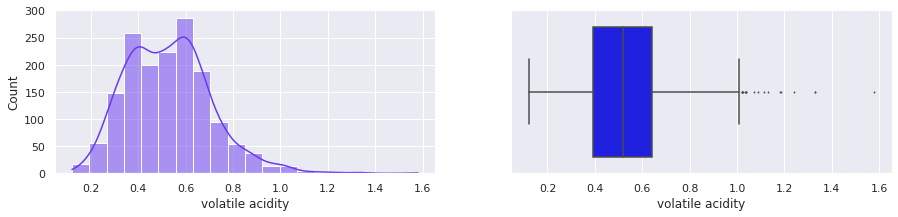

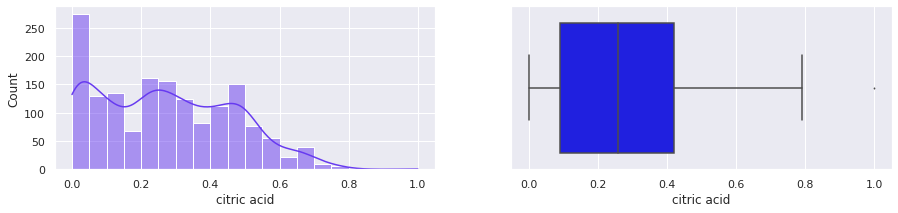

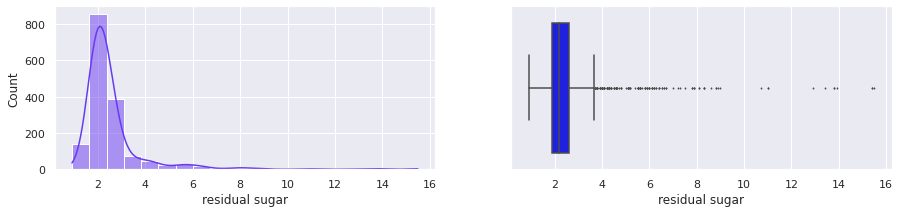

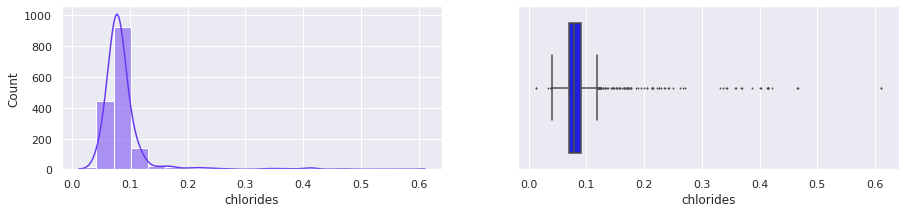

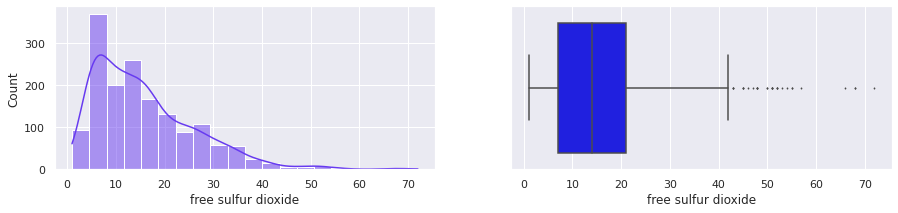

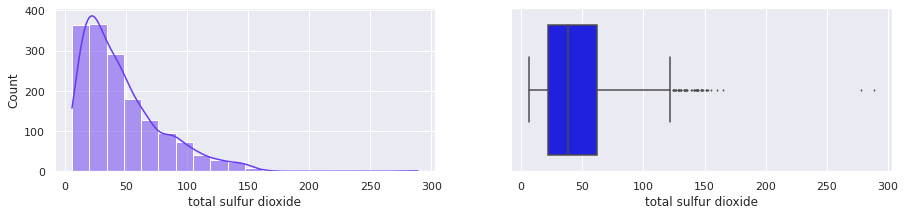

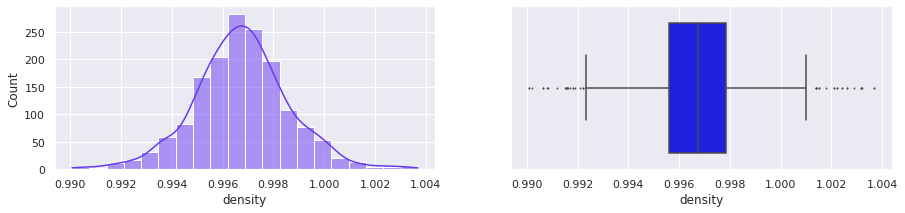

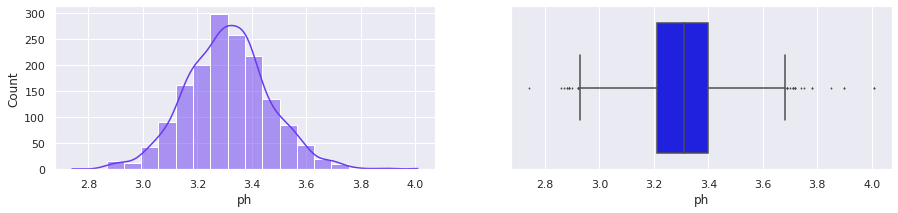

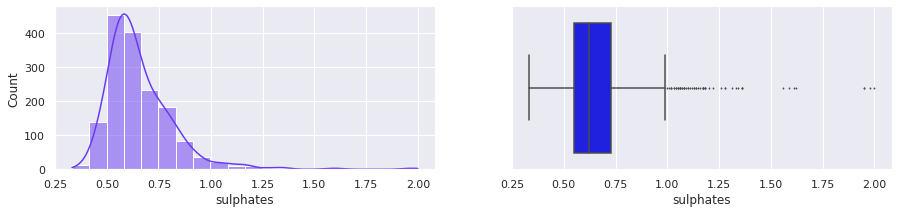

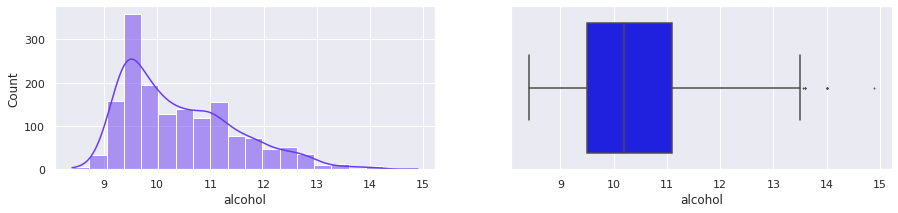

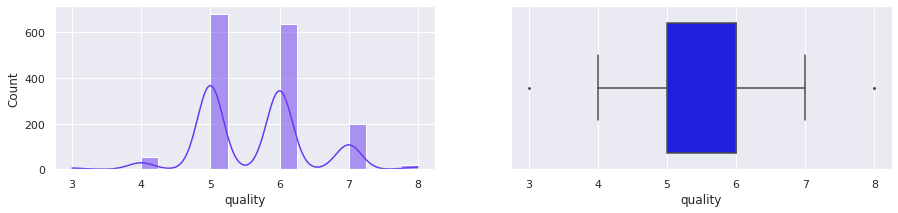

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
ph                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

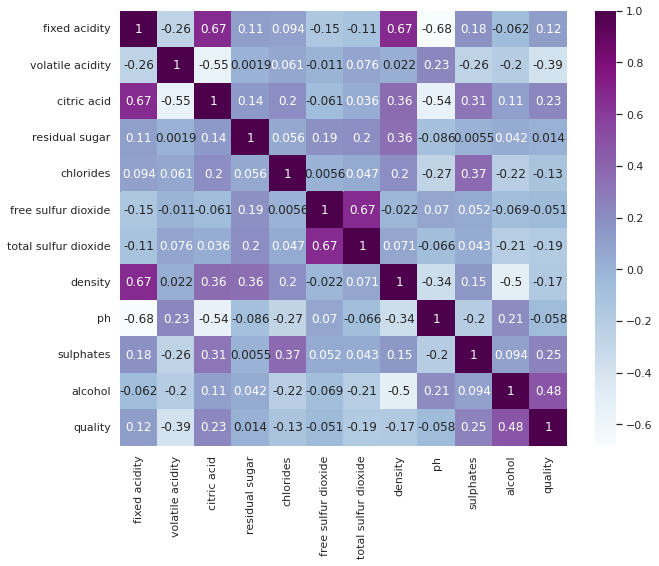

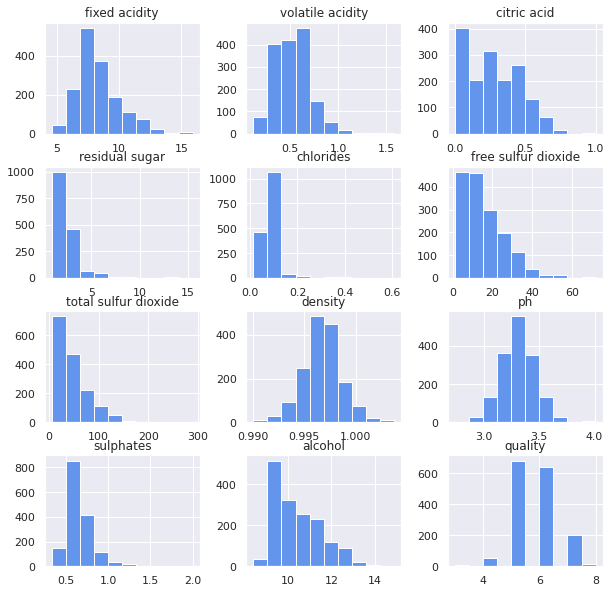

In [ ]:
def visual(data):
    print(data.columns)
    sns.set(style="darkgrid")
    sns.histplot(data=data, x="quality")
    plt.show()
#   I will plot a boxplot each column against target variable
    sns.boxplot('quality', 'fixed acidity', data = data)
    plt.show()
    sns.boxplot('quality', 'volatile acidity', data = data)
    plt.show()
    sns.boxplot('quality', 'citric acid', data = data)
    plt.show()
    sns.boxplot('quality', 'residual sugar', data = data)
    plt.show()
    sns.boxplot('quality', 'chlorides', data = data)
    plt.show()
    sns.boxplot('quality', 'free sulfur dioxide', data = data)
    plt.show()
    sns.boxplot('quality', 'total sulfur dioxide', data = data)
    plt.show()
    sns.boxplot('quality', 'density', data = data)
    plt.show()
    sns.boxplot('quality', 'ph', data = data)
    plt.show()
    sns.boxplot('quality', 'sulphates', data = data)
    plt.show()
    sns.boxplot('quality', 'alcohol', data = data)
    plt.show()
    print("Distribution plot for each feature", '\n')
    for i in data:
        sns.set(style="darkgrid")
        fig, axs = plt.subplots(1, 2, figsize=(15, 3))

        sns.histplot(data[i], bins=20, kde=True, ax=axs[0],color='#673af0');
        sns.boxplot(data[i], ax=axs[1], color='blue', fliersize=1);
    
    plt.show()
    print(data.corr(),'\n')
    print(data.corr()['quality'].sort_values(ascending=False))
    plt.figure(figsize=(10, 8))
    sns.heatmap(data=data.corr(), annot=True, cmap="BuPu")
    plt.show()
    sns.set()
    data.hist(figsize=(10, 10), color='cornflowerblue')
    plt.show()
    sns.pairplot(data,plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
    plt.show()


visual(cle)

In [ ]:
def machine_learning(data):
    x = data.drop('quality', axis=1)
    y = data['quality']
    model = LinearRegression()
    model2 = RandomForestClassifier()
    model3 = SVC()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    model.fit(x_train, y_train)
    model2.fit(x_train, y_train)
    model3.fit(x_train, y_train)
    model1_prediction = model.predict(x_test)
    model2_predict = model2.predict(x_test)
    model3_predict = model3.predict(x_test)
    model2_acuracy_score = accuracy_score(y_test, model2_predict)
    model3_accuracy_score = accuracy_score(y_test, model3_predict)
    print('LinearRegression:',r2_score(y_test, model1_prediction))
    print('RandomForestClassifier:',model2_acuracy_score * 100)
    print('SVC:',model3_accuracy_score * 100)
    print('As we can see our second model gives us good prediction accuracy to wines classifiaction')
machine_learning(cle)